In [1]:
!pip install youtube-comment-downloader
from youtube_comment_downloader import YoutubeCommentDownloader
import pandas as pd

downloader = YoutubeCommentDownloader()
comments = downloader.get_comments_from_url('https://www.youtube.com/watch?v=PtDG6--j3-I')

all_comments = []
for comment in comments:
    all_comments.append(comment)
    if len(all_comments) >= 1000:  # Limit to 1000 comments
        break

df = pd.DataFrame(all_comments)
df.to_csv('CBUM-comment.csv', index=False)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.7/295.7 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.9/507.9 kB 29.4 MB/s eta 0:00:00
  Attempting uninstall: pytz
    Found existing installation: pytz 2024.1
    Uninstalling pytz-2024.1:
      Successfully uninstalled pytz-2024.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
apache-beam 2.46.0 requires cloudpickle~=2.2.1, but you have cloudpickle 3.0.0 which is incompatible.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.8 which is incompatible.
apache-beam 2.46.0 requires numpy<1.25.0,>=1.14.3, but you have numpy 1.26.4 which is incompatible.
apache-beam 2.46.0 requires pyarrow<10.0.0,>=3.0.0, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 7.1.0 requires pyarrow<15,>=2, but you have pyarrow 17.0.0 which is incompatible.
xarray 2024.9.0 r

# Datatransformation

In [2]:
#Libraries 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import os

# Import functions for data preprocessing & data preparation
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer, LancasterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from nltk.corpus import wordnet
import string
from string import punctuation
import nltk
import re
!pip install twython


/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [3]:
data = pd.read_csv('/kaggle/working/CBUM-comment.csv')
print(data.columns)

Index(['cid', 'text', 'time', 'author', 'channel', 'votes', 'replies', 'photo',
       'heart', 'reply', 'time_parsed'],
      dtype='object')


In [4]:
data = pd.read_csv('/kaggle/working/CBUM-comment.csv')

# If you want to keep only the 'text' column (which contains the comments):
data1 = data[['text']]

# Or if you want to drop specific columns and keep the rest:
data1 = data.drop(['cid', 'time', 'author', 'channel','votes','replies', 'photo', 'heart', 'reply', 'time_parsed'], axis=1)

# Display the first few rows of the resulting DataFrame
print(data1.head())

                                                text
0  💪Check out my training on the new app!:  https...
1                                will miss you daddy
2  love the camera work in the intro, vhs never g...
3  2028 and he will still be "The Standard". I'm ...
4                      i saw the last dance. Thenks!


In [5]:
data1.sample(6)

,text
327,"I almost cried, what a legend"
797,2018- couldn't even look himself in the mirror...
660,Old vibes 🔥
675,18:29 the amount of respect and love that this...
28,1:20 is priceless.
407,Enjoy fatherhood legend!


# Data labelling

In [6]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()

data1["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data1["text"]]
data1["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data1["text"]]
data1["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data1["text"]]
data1['Compound'] = [sentiments.polarity_scores(i)["compound"] for i in data1["text"]]

score = data1["Compound"].values
sentiment = []
for i in score:
    if i >= 0.05:
        sentiment.append('Positive')
    elif i <= -0.05:
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')

data1["Sentiment"] = sentiment
print(data1.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
                                                text  Positive  Negative  \
0  💪Check out my training on the new app!:  https...     0.000     0.000   
1                                will miss you daddy     0.000     0.348   
2  love the camera work in the intro, vhs never g...     0.296     0.000   
3  2028 and he will still be "The Standard". I'm ...     0.000     0.000   
4                      i saw the last dance. Thenks!     0.000     0.000   

   Neutral  Compound Sentiment  
0    1.000    0.0000   Neutral  
1    0.652   -0.1531  Negative  
2    0.704    0.6369  Positive  
3    1.000    0.0000   Neutral  
4    1.000    0.0000   Neutral  


In [7]:
data1.sample(5)

,text,Positive,Negative,Neutral,Compound,Sentiment
340,Jessie james west🤣😂,0.000,0.0,1.000,0.0000,Neutral
342,A legend...,0.000,0.0,1.000,0.0000,Neutral
387,Thank you. You have built a foundation of humb...,0.351,0.0,0.649,0.9538,Positive
343,wow so many buff mens,0.487,0.0,0.513,0.5859,Positive
549,14:05 crish putra njerr wkwk,0.000,0.0,1.000,0.0000,Neutral


# Final data

In [8]:
data2=data1.drop(['Positive','Negative','Neutral','Compound'],axis=1)
data2.head()

,text,Sentiment
0,💪Check out my training on the new app!: https...,Neutral
1,will miss you daddy,Negative
2,"love the camera work in the intro, vhs never g...",Positive
3,"2028 and he will still be ""The Standard"". I'm ...",Neutral
4,i saw the last dance. Thenks!,Neutral


In [9]:
data2.sample(5)

,text,Sentiment
807,You too Urs you’re the man!,Neutral
299,Drug abuse is a sign of weakness. The only thi...,Negative
785,"Bro won the olympia for the 6th time, retired ...",Positive
564,Bruuh that's lovely🥹,Neutral
796,congrats u big human being - absolutely amazing,Positive


In [10]:
sentiment_counts = data2['Sentiment'].value_counts()
print(sentiment_counts)

Sentiment
Positive    503
Neutral     413
Negative     84
Name: count, dtype: int64


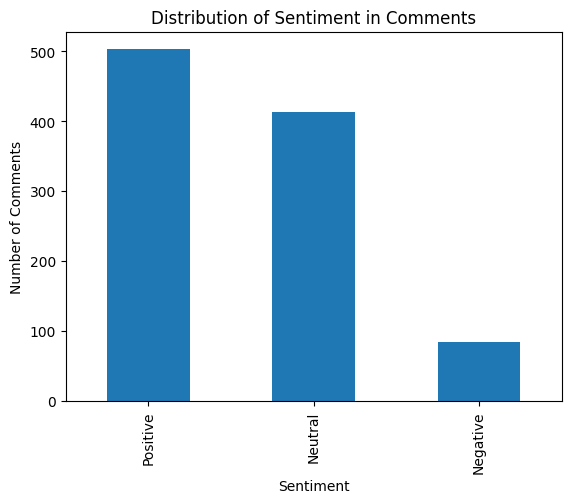

In [11]:
import matplotlib.pyplot as plt

sentiment_counts.plot(kind='bar')
plt.title('Distribution of Sentiment in Comments')
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
plt.show()

# Data transformation

In [12]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, LancasterStemmer, WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer

# Download necessary NLTK data
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize the tools
stop_words = stopwords.words('english')
porter_stemmer = PorterStemmer()
lancaster_stemmer = LancasterStemmer() 
snowball_stemmer = SnowballStemmer(language="english")
lzr = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [13]:
data2.sample(5)

,text,Sentiment
625,HOPEFULLY NOT THE LAST VIDEO,Positive
564,Bruuh that's lovely🥹,Neutral
32,Congrats CBUM,Positive
233,Legendary,Neutral
81,His eyes are trying to say something i think,Neutral


In [14]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Initialize stopwords
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove new line characters
    text = re.sub(r'\n', ' ', text)
    
    # Remove punctuations and special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Remove multiple spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Tokenize
    tokens = word_tokenize(text)
    
    # Remove stopwords
    processed_tokens = [word for word in tokens if word not in stop_words]
    
    # Join tokens back into string
    return ' '.join(processed_tokens)

# Apply the preprocessing
data_copy = data2.copy()
data_copy['processed_text'] = data_copy['text'].apply(preprocess_text)

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
print(data_copy[['text', 'processed_text', 'Sentiment']].head())

                                                text  \
0  💪Check out my training on the new app!:  https...   
1                                will miss you daddy   
2  love the camera work in the intro, vhs never g...   
3  2028 and he will still be "The Standard". I'm ...   
4                      i saw the last dance. Thenks!   

                              processed_text Sentiment  
0   check training new app httpswwwstndrdapp   Neutral  
1                                 miss daddy  Negative  
2  love camera work intro vhs never gets old  Positive  
3            still standard im tellin u guys   Neutral  
4                      saw last dance thenks   Neutral  


In [16]:
data_copy['Sentiment'].value_counts()

Sentiment
Positive    503
Neutral     413
Negative     84
Name: count, dtype: int64

In [17]:
data_copy.isnull().sum()

text              0
Sentiment         0
processed_text    0
dtype: int64

In [18]:
# le = LabelEncoder()
# data_copy['Sentiment'] = le.fit_transform(data_copy['Sentiment'])
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_copy['Sentiment'] = le.fit_transform(data_copy['Sentiment'])

In [19]:
# Print the first few rows to see the encoded sentiments
print(data_copy[['processed_text', 'Sentiment']].head())

# Check the unique values in the encoded Sentiment column
print("\nUnique encoded sentiment values:")
print(data_copy['Sentiment'].unique())

# Print the mapping of original labels to encoded values
print("\nEncoding mapping:")
for i, label in enumerate(le.classes_):
    print(f"{label}: {i}")

# Count the occurrences of each sentiment
print("\nSentiment value counts:")
print(data_copy['Sentiment'].value_counts())

                              processed_text  Sentiment
0   check training new app httpswwwstndrdapp          1
1                                 miss daddy          0
2  love camera work intro vhs never gets old          2
3            still standard im tellin u guys          1
4                      saw last dance thenks          1

Unique encoded sentiment values:
[1 0 2]

Encoding mapping:
Negative: 0
Neutral: 1
Positive: 2

Sentiment value counts:
Sentiment
2    503
1    413
0     84
Name: count, dtype: int64


In [20]:
import gensim
from gensim.models import LdaModel
from gensim.corpora import Dictionary
import spacy

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Create a list of preprocessed texts
texts = data_copy['processed_text'].tolist()

# Tokenize each text (split into individual words)
tokenized_texts = []
for text in texts:
  doc = nlp(text)
  tokens = [token.text for token in doc if token.is_alpha]  # Extract only alphanumeric tokens
  tokenized_texts.append(tokens)

# Create a dictionary and corpus
dictionary = Dictionary(tokenized_texts)
corpus = [dictionary.doc2bow(text) for text in tokenized_texts]

# Train LDA model
lda_model = LdaModel(corpus, num_topics=5, id2word=dictionary)

# Print topics
print(lda_model.print_topics())



[(0, '0.027*"chris" + 0.018*"legend" + 0.010*"goat" + 0.010*"man" + 0.009*"champ" + 0.008*"best" + 0.008*"one" + 0.008*"everything" + 0.007*"standard" + 0.007*"family"'), (1, '0.025*"chris" + 0.015*"nt" + 0.012*"thank" + 0.011*"man" + 0.010*"congrats" + 0.009*"legend" + 0.009*"u" + 0.009*"video" + 0.009*"mr" + 0.008*"olympia"'), (2, '0.011*"nt" + 0.011*"you" + 0.009*"chris" + 0.008*"s" + 0.008*"cbum" + 0.008*"i" + 0.007*"like" + 0.007*"time" + 0.006*"congrats" + 0.006*"bodybuilding"'), (3, '0.022*"cbum" + 0.015*"video" + 0.015*"love" + 0.012*"chris" + 0.011*"like" + 0.009*"legend" + 0.008*"last" + 0.007*"thank" + 0.007*"i" + 0.007*"see"'), (4, '0.013*"life" + 0.009*"best" + 0.009*"man" + 0.008*"chris" + 0.007*"thank" + 0.007*"love" + 0.007*"many" + 0.006*"great" + 0.006*"family" + 0.006*"inspiration"')]


In [21]:
import pyLDAvis
import pyLDAvis.gensim

# Assuming you have your LDA model and corpus defined
lda_model = lda_model
corpus = corpus
dictionary = dictionary

# Create visualization data
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)

# Display the visualization
pyLDAvis.display(vis)

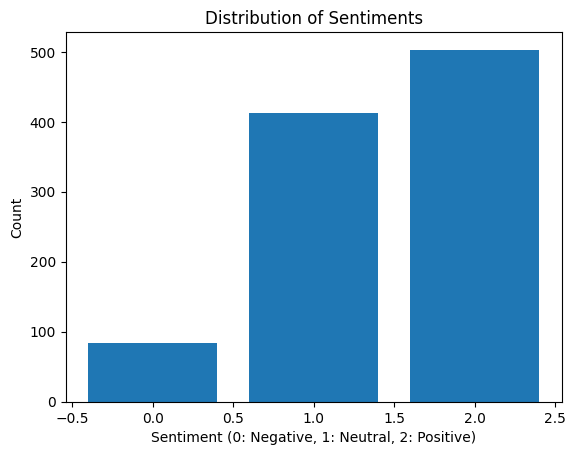

In [22]:
import matplotlib.pyplot as plt

sentiment_counts = data_copy['Sentiment'].value_counts().sort_index()
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment (0: Negative, 1: Neutral, 2: Positive)')
plt.ylabel('Count')
plt.show()

In [23]:
data_copy.processed_text

0               check training new app httpswwwstndrdapp
1                                             miss daddy
2              love camera work intro vhs never gets old
3                        still standard im tellin u guys
4                                  saw last dance thenks
                             ...                        
995    already commented th title channelchirsyou alw...
996                                                  man
997        last dance somebodys fan venom respect broski
998                           shit got got bit emotional
999           cant say still long life ahead first years
Name: processed_text, Length: 1000, dtype: object

In [24]:
processed_data = {
    'Sentence':data_copy.processed_text,
    'Sentiment':data_copy['Sentiment']
}

processed_data = pd.DataFrame(processed_data)
processed_data.head()

,Sentence,Sentiment
0,check training new app httpswwwstndrdapp,1
1,miss daddy,0
2,love camera work intro vhs never gets old,2
3,still standard im tellin u guys,1
4,saw last dance thenks,1


In [25]:
processed_data['Sentiment'].value_counts()

Sentiment
2    503
1    413
0     84
Name: count, dtype: int64

In [27]:
df_neutral = processed_data[(processed_data['Sentiment']==1)] 
df_negative = processed_data[(processed_data['Sentiment']==0)]
df_positive = processed_data[(processed_data['Sentiment']==2)]

# upsample minority classes
df_negative_upsampled = resample(df_negative, 
                                 replace=True,    
                                 n_samples= 205, 
                                 random_state=42)  

df_neutral_upsampled = resample(df_neutral, 
                                 replace=True,    
                                 n_samples= 205, 
                                 random_state=42)  


# Concatenate the upsampled dataframes with the neutral dataframe
final_data = pd.concat([df_negative_upsampled,df_neutral_upsampled,df_positive])

In [28]:
final_data['Sentiment'].value_counts()

Sentiment
2    503
0    205
1    205
Name: count, dtype: int64

In [29]:
corpus = []
for sentence in final_data['Sentence']:
    corpus.append(sentence)
corpus[0:5]

['one even close cbum stayed least another two victories',
 'end era legend miss presence stage',
 'bro goofy af favorite one beating regardless way samson aint bigger shape dude thats one example',
 'magical seeing two next posing nach den ganzen gymsession war das geil',
 'damn big dawgs playing bg']

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
y = final_data.iloc[:, -1].values

# Machine learning model

In [31]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Models   
#  Selection and Evaluation
models = {
    'Naive Bayes (Gaussian)': GaussianNB(),
    'Naive Bayes (Multinomial)': MultinomialNB(),
    'Naive Bayes (Bernoulli)': BernoulliNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Support Vector Machine': SVC(),}
    

for model_name, model in models.items():
    print(f"Training {model_name} model...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"Confusion Matrix for {model_name}:\n", cm)
    print(f"Accuracy for {model_name}: {accuracy:.2f}")
    print(f"Precision for {model_name}: {precision:.2f}")
    print(f"Recall for {model_name}: {recall:.2f}")
    print(f"F1-score for {model_name}: {f1:.2f}\n")

Training Naive Bayes (Gaussian) model...
Confusion Matrix for Naive Bayes (Gaussian):
 [[ 47   1   6]
 [  6  39  22]
 [ 12   7 134]]
Accuracy for Naive Bayes (Gaussian): 0.80
Precision for Naive Bayes (Gaussian): 0.81
Recall for Naive Bayes (Gaussian): 0.80
F1-score for Naive Bayes (Gaussian): 0.80

Training Naive Bayes (Multinomial) model...
Confusion Matrix for Naive Bayes (Multinomial):
 [[ 45   1   8]
 [  1  22  44]
 [  6   9 138]]
Accuracy for Naive Bayes (Multinomial): 0.75
Precision for Naive Bayes (Multinomial): 0.74
Recall for Naive Bayes (Multinomial): 0.75
F1-score for Naive Bayes (Multinomial): 0.73

Training Naive Bayes (Bernoulli) model...
Confusion Matrix for Naive Bayes (Bernoulli):
 [[ 23   2  29]
 [  0  18  49]
 [  0   6 147]]
Accuracy for Naive Bayes (Bernoulli): 0.69
Precision for Naive Bayes (Bernoulli): 0.73
Recall for Naive Bayes (Bernoulli): 0.69
F1-score for Naive Bayes (Bernoulli): 0.65

Training Logistic Regression model...
Confusion Matrix for Logistic Regre

# Deep Learning Models

/opt/conda/lib/python3.10/site-packages/tensorflow/lite/python/util.py:51: DeprecationWarning: jax.xla_computation is deprecated. Please use the AOT APIs; see https://jax.readthedocs.io/en/latest/aot.html. For example, replace xla_computation(f)(*xs) with jit(f).lower(*xs).compiler_ir('hlo'). See CHANGELOG.md for 0.4.30 for more examples.
  from jax import xla_computation as _xla_computation
/opt/conda/lib/python3.10/site-packages/tensorflow/lite/python/util.py:51: DeprecationWarning: jax.xla_computation is deprecated. Please use the AOT APIs; see https://jax.readthedocs.io/en/latest/aot.html. For example, replace xla_computation(f)(*xs) with jit(f).lower(*xs).compiler_ir('hlo'). See CHANGELOG.md for 0.4.30 for more examples.
  from jax import xla_computation as _xla_computation
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)`


Training Simple Neural Network...
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Results for Simple Neural Network:
Confusion Matrix:
[[ 44   3   8]
 [  2  45  23]
 [  6  17 126]]
Accuracy: 0.78
Precision: 0.78
Recall: 0.78
F1-score: 0.78



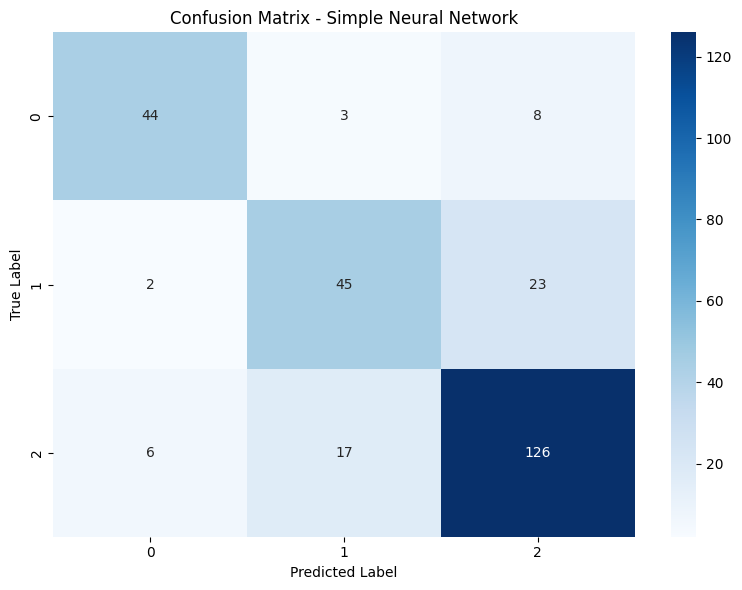

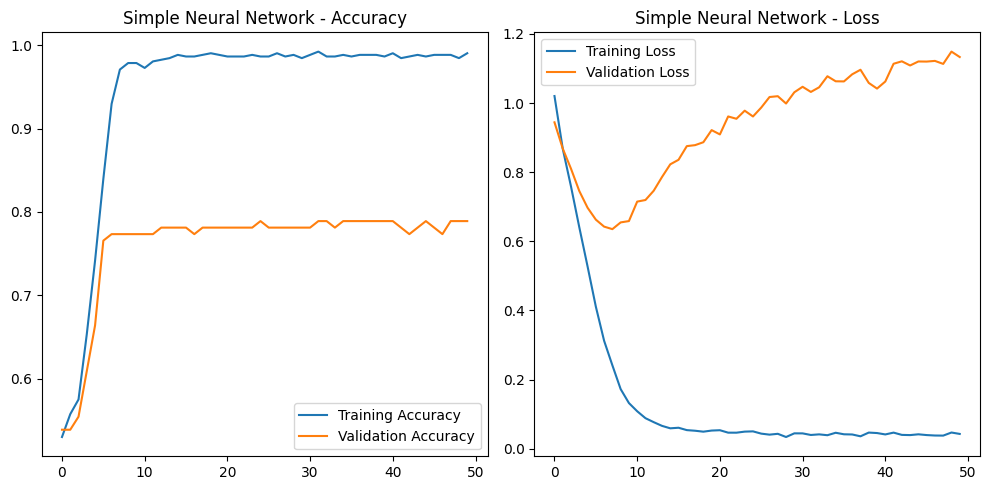


Training Deep Neural Network...
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Results for Deep Neural Network:
Confusion Matrix:
[[ 46   1   8]
 [  3  46  21]
 [  3  17 129]]
Accuracy: 0.81
Precision: 0.81
Recall: 0.81
F1-score: 0.80



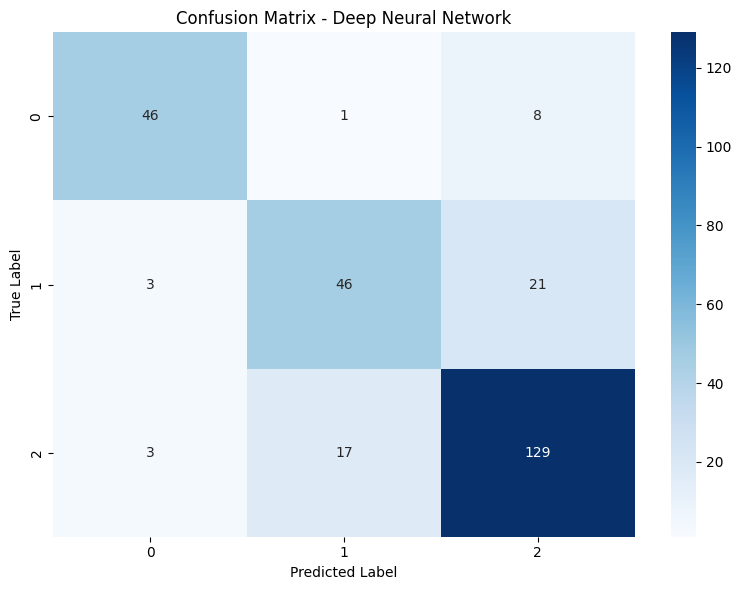

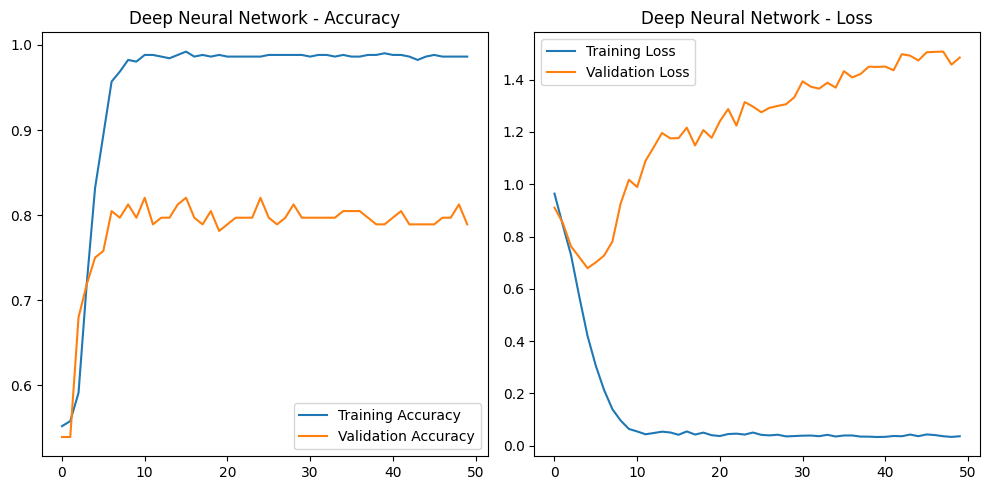

In [32]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Embedding
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

#Define Deep Learning Models
def create_models(input_shape, num_classes):
    models = {
        'Simple Neural Network': Sequential([
            Dense(128, activation='relu', input_shape=(input_shape,)),
            Dropout(0.3),
            Dense(64, activation='relu'),
            Dropout(0.3),
            Dense(num_classes, activation='softmax')
        ]),
        
        'Deep Neural Network': Sequential([
            Dense(256, activation='relu', input_shape=(input_shape,)),
            Dropout(0.4),
            Dense(128, activation='relu'),
            Dropout(0.3),
            Dense(64, activation='relu'),
            Dropout(0.2),
            Dense(num_classes, activation='softmax')
        ])
        
       
    }
    
    return models


# Evaluation Function
def evaluate_model(model, X_test, y_test, model_name):
    # Predict
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_test_classes = np.argmax(y_test, axis=1)
    
    # Metrics
    cm = confusion_matrix(y_test_classes, y_pred_classes)
    accuracy = accuracy_score(y_test_classes, y_pred_classes)
    precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
    recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
    f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')
    
    # Print Results
    print(f"Results for {model_name}:")
    print(f"Confusion Matrix:\n{cm}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}\n")
    
    # Confusion Matrix Visualization
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()
    
    return accuracy, precision, recall, f1

# Main Training and Evaluation Function
def train_and_evaluate_models(X, y, test_size=0.3, random_state=42):
    # Prepare train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )
    
    # Get input shape and number of classes
    input_shape = X_train.shape[1]
    num_classes = len(np.unique(y))
    
    # One-hot encode labels
    y_train_encoded = tf.keras.utils.to_categorical(y_train)
    y_test_encoded = tf.keras.utils.to_categorical(y_test)
    
    # Create models
    models = create_models(input_shape, num_classes)
    
    # Results tracking
    model_results = {}
    
    # Train and evaluate each model
    for model_name, model in models.items():
        print(f"\nTraining {model_name}...")
        
        # Compile model
        model.compile(
            optimizer=Adam(learning_rate=0.001),
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )
        
        # Train model
        history = model.fit(
            X_train, y_train_encoded, 
            epochs=50, 
            batch_size=32, 
            validation_split=0.2,
            verbose=0
        )
        
        # Evaluate model
        results = evaluate_model(model, X_test, y_test_encoded, model_name)
        model_results[model_name] = results
        
        # Plot training history
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'{model_name} - Accuracy')
        plt.legend()
        
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'{model_name} - Loss')
        plt.legend()
        plt.tight_layout()
        plt.show()
    
    return model_results

# Usage
# Assuming X and y are already prepared from previous preprocessing
results = train_and_evaluate_models(X, y)

Training Naive Bayes (Gaussian) model...
Confusion Matrix for Naive Bayes (Gaussian):



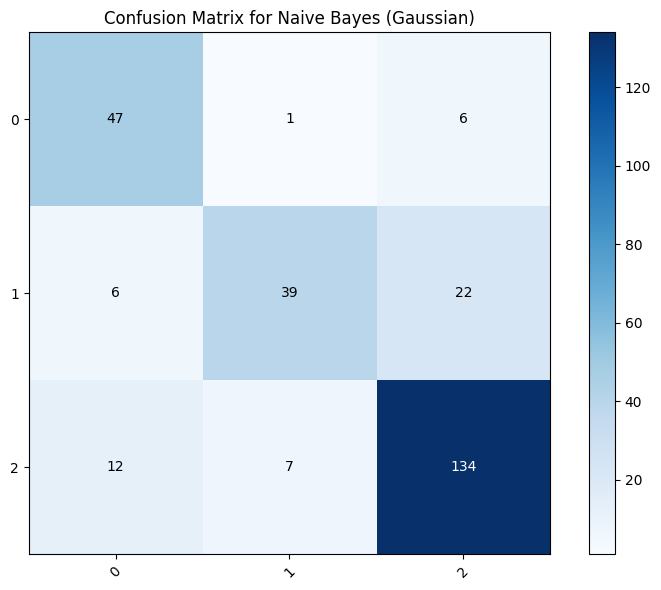

Accuracy for Naive Bayes (Gaussian): 0.80
Precision for Naive Bayes (Gaussian): 0.81
Recall for Naive Bayes (Gaussian): 0.80
F1-score for Naive Bayes (Gaussian): 0.80

Training Naive Bayes (Multinomial) model...
Confusion Matrix for Naive Bayes (Multinomial):



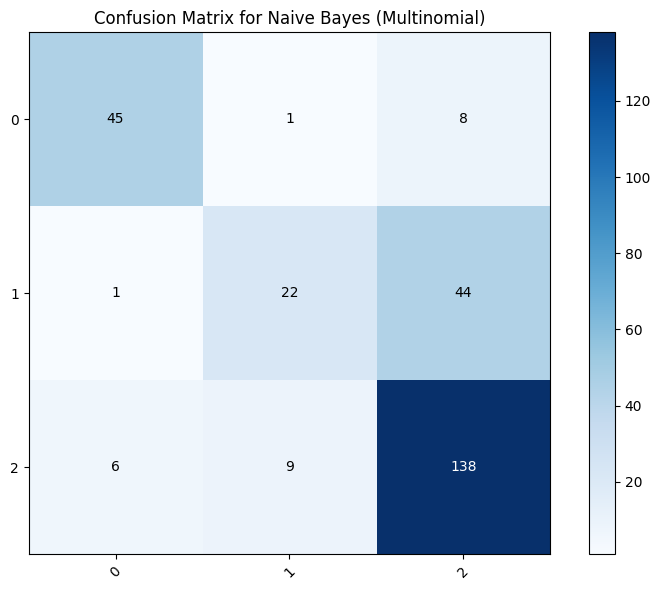

Accuracy for Naive Bayes (Multinomial): 0.75
Precision for Naive Bayes (Multinomial): 0.74
Recall for Naive Bayes (Multinomial): 0.75
F1-score for Naive Bayes (Multinomial): 0.73

Training Naive Bayes (Bernoulli) model...
Confusion Matrix for Naive Bayes (Bernoulli):



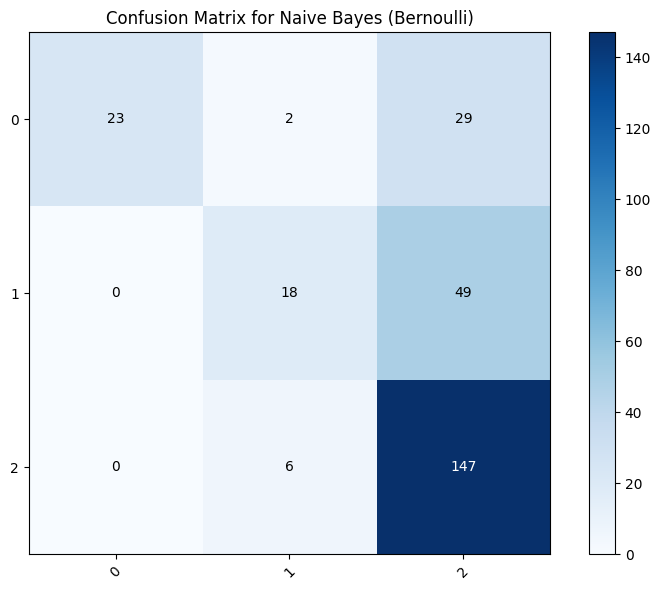

Accuracy for Naive Bayes (Bernoulli): 0.69
Precision for Naive Bayes (Bernoulli): 0.73
Recall for Naive Bayes (Bernoulli): 0.69
F1-score for Naive Bayes (Bernoulli): 0.65

Training Logistic Regression model...
Confusion Matrix for Logistic Regression:



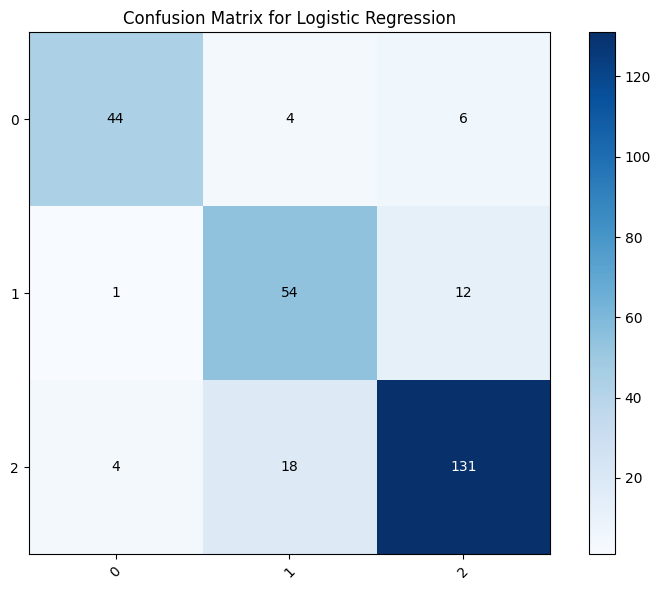

Accuracy for Logistic Regression: 0.84
Precision for Logistic Regression: 0.84
Recall for Logistic Regression: 0.84
F1-score for Logistic Regression: 0.84

Training Support Vector Machine model...
Confusion Matrix for Support Vector Machine:



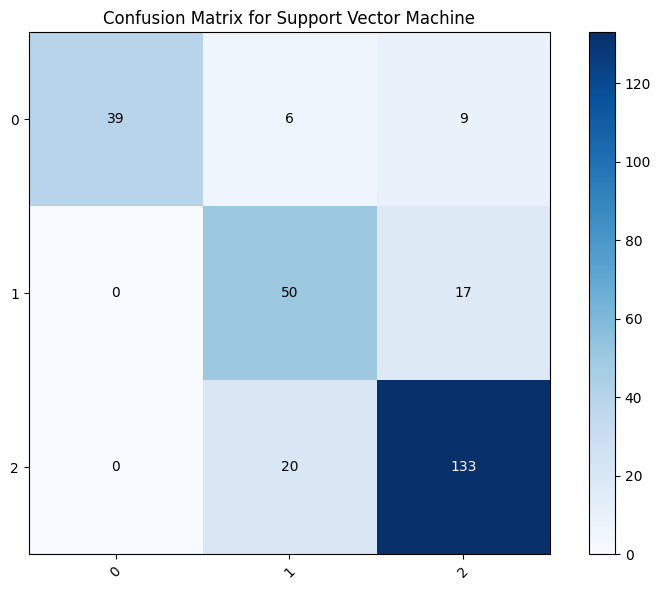

Accuracy for Support Vector Machine: 0.81
Precision for Support Vector Machine: 0.83
Recall for Support Vector Machine: 0.81
F1-score for Support Vector Machine: 0.81



In [33]:
#  Function to plot confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, cmap='Blues')
    plt.colorbar()
    classes = [str(x) for x in range(len(cm))]
    plt.xticks(range(len(classes)), classes, rotation=45)
    plt.yticks(range(len(classes)), classes)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.grid(False)

    for i in range(len(cm)):
        for j in range(len(cm[0])):
            plt.text(j, i, cm[i, j], ha='center', va='center', color='white' if cm[i, j] > cm.max() / 2 else 'black')
    plt.tight_layout()
    plt.show()

for model_name, model in models.items():
    print(f"Training {model_name} model...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"Confusion Matrix for {model_name}:\n")
    plot_confusion_matrix(cm, model_name)  # Plot the confusion matrix

    print(f"Accuracy for {model_name}: {accuracy:.2f}")
    print(f"Precision for {model_name}: {precision:.2f}")
    print(f"Recall for {model_name}: {recall:.2f}")
    print(f"F1-score for {model_name}: {f1:.2f}\n")
